In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults 
from sklearn.metrics import mean_squared_error as mse

In [76]:
# This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city of Melbourne, Australia.
series = pd.read_csv('daily-min-temperatures.csv', header = 0, index_col = 0)
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


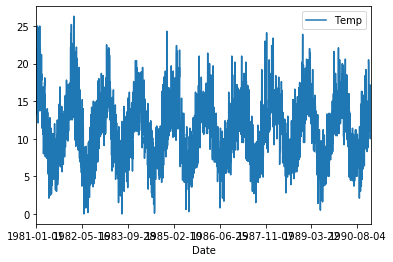

In [77]:
series.plot()
plt.show()

In [85]:
# making the data stationary
def difference(dataset, interval = 1):
    diff = []
    for i in range(interval,len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)       
    return np.array(diff)

# inverting above operation
def inverse_diff(history, ypred, interval = 1):
    return ypred + history[-interval]


In [86]:
# Splitting data
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

# saving the files
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 3643, Validation 7


In [87]:
# loading entire dataset
series = pd.read_csv('daily-min-temperatures.csv', header = 0, index_col = 0)

# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)

In [91]:
# fit model
model = ARIMA(differenced, order = (7,0,1))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3285
Model:                     ARMA(7, 1)   Log Likelihood               -8689.286
Method:                       css-mle   S.D. of innovations              3.408
Date:                Tue, 31 Mar 2020   AIC                          17398.571
Time:                        00:57:02   BIC                          17459.542
Sample:                             0   HQIC                         17420.401
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0149      0.132      0.113      0.910      -0.244       0.274
ar.L1.y        1.1436      0.287      3.983      0.000       0.581       1.706
ar.L2.y       -0.4355      0.154     -2.835      0.0

In [95]:
# Method 1 - using forecast
# one step Out-of-Sample Forecast
forecast = model_fit.forecast()[0]

In [98]:
# Method 2 - using predict
# forecast using ARIMAResults 
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict (start = start_index, end = end_index)

In [100]:
forecast = inverse_diff(X, forecast, days_in_year)
forecast

array([14.87253587])

In [101]:
# Method 1 - using forecast
# multi Step Out-of-Sample Forecast
forecast = model_fit.forecast(steps=7)[0]

In [102]:
forecast

array([0.07253587, 0.0959086 , 0.12357062, 0.15440658, 0.17522802,
       0.16297693, 0.13153942])

In [104]:
# Method 2 - using Predict
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict (start = start_index, end = end_index)
forecast

array([0.07253587, 0.0959086 , 0.12357062, 0.15440658, 0.17522802,
       0.16297693, 0.13153942])

In [105]:
# inverting the differenced forecast
history = [x for x in X]
day = 1
for yhat in forecast:
    inv = inverse_diff(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inv))
    history.append(inv)
    day += 1

Day 1: 14.872536
Day 2: 13.395909
Day 3: 15.723571
Day 4: 14.654407
Day 5: 14.475228
Day 6: 15.462977
Day 7: 16.531539
